In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784",as_frame=False)
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784)),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',


In [3]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [4]:
mnist.data.shape,mnist.target.shape

((70000, 784), (70000,))

In [5]:
X,y = mnist.data,mnist.target
print(X.shape)
print(y.shape)
print(y[:10])

(70000, 784)
(70000,)
['5' '0' '4' '1' '9' '2' '1' '3' '1' '4']


In [6]:
def plot_image(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis('off')



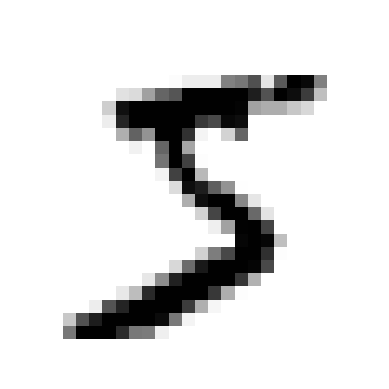

In [7]:
some_digit = X[0]
plot_image(some_digit)
plt.show()

In [8]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (60000, 784)
X_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


In [9]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42,n_jobs=-1)
sgd_clf.fit(X_train,y_train_5)

,"loss loss: {'hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'}, default='hinge'The loss function to be used.- 'hinge' gives a linear SVM.- 'log_loss' gives logistic regression, a probabilistic classifier.- 'modified_huber' is another smooth loss that brings tolerance to outliers as well as probability estimates.- 'squared_hinge' is like hinge but is quadratically penalized.- 'perceptron' is the linear loss used by the perceptron algorithm.- The other losses, 'squared_error', 'huber', 'epsilon_insensitive' and 'squared_epsilon_insensitive' are designed for regression but can be useful in classification as well; see :class:`~sklearn.linear_model.SGDRegressor` for a description.More details about the losses formulas can be found in the :ref:`User Guide` and you can find a visualisation of the lossfunctions in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_loss_functions.py`.",'hinge'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",-1


In [11]:
print(some_digit.shape)
# we need to transform this into a 2d array
# we can either reshape(1,-1) or add another dimension like [some_digit]

(784,)


In [12]:
print(sgd_clf.predict([some_digit]))

[ True]


In [13]:
print(sgd_clf.predict(some_digit.reshape(1,-1)))

[ True]


In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,n_jobs=-1,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

Accuracy is the ratio of correct predictions

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

kfolds = StratifiedKFold(n_splits=3)

for train_index,test_index in kfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred)) 
    

0.95035
0.96035
0.9604


In [16]:
from sklearn.dummy import DummyClassifier
# dummy classifier classifies with most the frequent class 
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [17]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring='accuracy',n_jobs=-1)

array([0.90965, 0.90965, 0.90965])

Confusion Matrix


In [18]:
from sklearn.model_selection import cross_val_predict 

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,n_jobs=-1)

In [19]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

A confusion matrix gives the count for no of instances of class A that were identifed as class B for all given A/B pairs

1. The  rows are actual classes and columns denote the predicted classes
2. first row represent actual non-5 class images:
- 53892 non-5's were correctly classified as non-5. These are called True Negatives.
- 687 non-5s were incorrectly classified as 5. These are called False Positives (Type-1 errors).
3. Second row represents the actual 5 class images:
- 1891 5's that are incorrectly classified as non-5. These are called False Negatives.
- 3530 5's correctly classified as 5's. These are called True Positives.

Precision and Recall

- Precision: Refers to the accuracy of positive predictions.
- Recall: Also called Sensitivity or True Positive Rate (TPR) is the ratio of positive instances correctly identified by the classifier.

In [20]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [21]:
precision = cm[1,1]/(cm[1,1] + cm[0,1])
print("Precision score:",precision)

Precision score: 0.8370879772350012


In [22]:
from sklearn.metrics import recall_score

recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [23]:
recall = cm[1,1]/(cm[1,0] + cm[1,1])
print("Recall score:",recall)

Recall score: 0.6511713705958311


In [24]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343847

PR Tradeoff

In [25]:
y_scores = sgd_clf.decision_function(some_digit.reshape(1,-1))
print(y_scores)

[2164.22030239]


In [26]:
threshold = 0 
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [27]:
threshold = 3000 
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


In [28]:
y_scores = cross_val_predict(sgd_clf,
                             X_train,
                             y_train_5,
                             cv=3,
                             method='decision_function',
                             n_jobs=-1)
print(y_scores)
print(y_scores.shape)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]
(60000,)


In [29]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_score=y_scores)
print("precisions shape:",precisions.shape)
print("thresholds shape:",thresholds.shape)
print("recalls shape:",recalls.shape)

precisions shape: (60001,)
thresholds shape: (60000,)
recalls shape: (60001,)


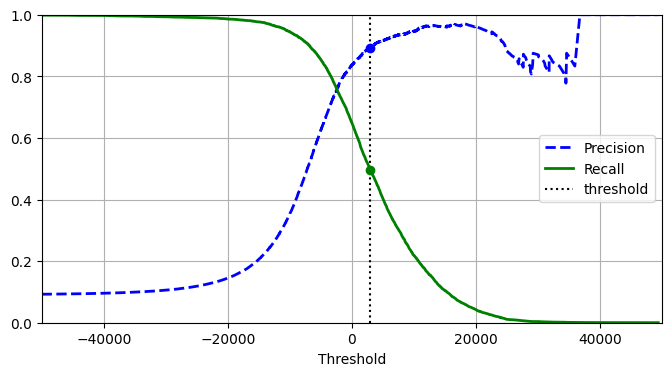

In [30]:
plt.figure(figsize=(8,4))
plt.plot(thresholds,precisions[:-1],"b--",label="Precision",linewidth=2)
# small note matplotlib uses this compact format [color][marker][linestyle] 
# we can also pass these as seperate parameters
plt.plot(thresholds,recalls[:-1],"g-",label="Recall",linewidth=2)
plt.vlines(threshold,0,1.0,"k","dotted",label="threshold")

idx = (thresholds >= threshold).argmax()
plt.plot(thresholds[idx],precisions[idx],"bo")
plt.plot(thresholds[idx],recalls[idx],"go")
plt.axis([-50000,50000,0,1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

A good way to select precision-recall trade off is to plot precision directly against recall.

In [31]:
print(recalls[idx])
print(precisions[idx])

0.4967718133185759
0.8911317008603574


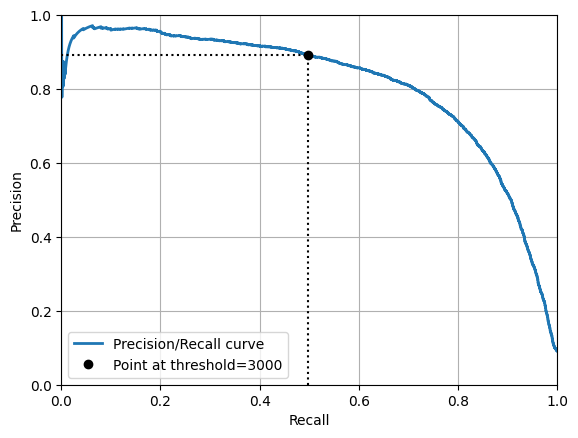

In [32]:
import matplotlib.patches as patches 

plt.plot(recalls,precisions,linewidth=2,label="Precision/Recall curve")

plt.plot([recalls[idx],recalls[idx]],[0.,precisions[idx]],"k:")
plt.plot([0.0,recalls[idx]],[precisions[idx],precisions[idx]],"k:")
plt.plot([recalls[idx]],[precisions[idx]],"ko",label="Point at threshold=3000")

plt.xlabel("Recall")
plt.ylabel("Precision")

plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc="lower left")
plt.show()


We can find the lowest threshold that gives us 0.90 precision

In [33]:
idx_for_precision_90 = (precisions >= 0.90).argmax()
threshold_90_precision = thresholds[idx_for_precision_90]

In [34]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [35]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [36]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [37]:
y_train_5

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [38]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447], shape=(60000,))

ROC Curve

In [39]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)
print("fpr shape:",fpr.shape)
print("tpr shape:",tpr.shape)
print("thresholds shape:",thresholds.shape)

fpr shape: (3908,)
tpr shape: (3908,)
thresholds shape: (3908,)


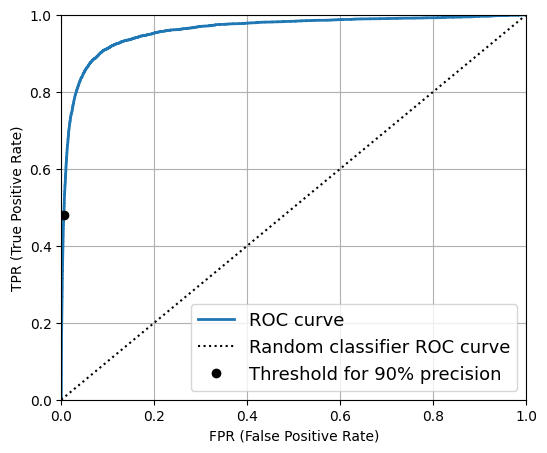

In [40]:
idx_for_threshold_90 = (thresholds <= threshold_90_precision).argmax()
tpr_90,fpr_90 = tpr[idx_for_threshold_90],fpr[idx_for_threshold_90]

plt.figure(figsize=(6,5))
plt.plot(fpr,tpr,linewidth=2,label="ROC curve")
plt.plot([0,1],[0,1],"k:",label="Random classifier ROC curve")
plt.plot([fpr_90],[tpr_90],"ko",label="Threshold for 90% precision")
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [41]:
from sklearn.metrics import roc_auc_score 

roc_auc_score(y_train_5,y_score=y_scores)

0.9604938554008616

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_jobs=-1,random_state=42) 

In [43]:
y_probas_forest = cross_val_predict(forest_clf,
                                    X_train,
                                    y_train_5,
                                    cv=3,
                                    n_jobs=-1,
                                    method='predict_proba')
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]], shape=(60000, 2))

In [44]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

For a binary classifier predict_proba(X) returns array of shape:
- `(n_samples,2)`
- each row contains:
- `[P(class_0),P(class_1)]`
- first row contains the probability of sample belonging in class 0.
- second row contains the probability of sample belonging in class 1. 





In [45]:
idx_50_to_60 = (y_probas_forest[:,1] > 0.50) & (y_probas_forest[:,1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")
# Note we cannot use the len() function here

94.0%


In [46]:
y_scores_forest = y_probas_forest[:,1]
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06], shape=(60000,))

In [47]:
precisions_forest,recalls_forest,thresholds_forests = precision_recall_curve(y_train_5,
                                                                             y_scores_forest)

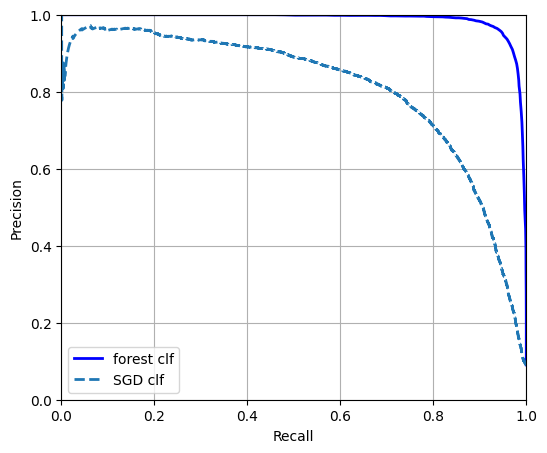

In [48]:
plt.figure(figsize=(6,5))

plt.plot(recalls_forest,precisions_forest,"b-",linewidth=2,label="forest clf")
plt.plot(recalls,precisions,'--',linewidth=2,label="SGD clf")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [49]:
y_train_pred_forest = y_probas_forest[:,1] >= 0.5
f1_score(y_train_5,y_train_pred_forest)

0.9274509803921569

In [50]:
precision_score(y_train_5,y_train_pred_forest)

0.9897468089558485

In [51]:
recall_score(y_train_5,y_train_pred_forest)

0.8725327430363402

Multiclass classification

In [52]:
from sklearn.svm import SVC 

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000],y_train[:2000])

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [53]:
svm_clf.decision_function_shape

'ovr'

In [54]:
svm_clf.predict(some_digit.reshape(1,-1))

array(['5'], dtype=object)

In [55]:
some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores)
print(some_digit_scores.shape)

[[ 3.79297828  0.72949369  6.06184129  8.29800527 -0.29383983  9.30157597
   1.74723215  2.77365456  7.20601456  4.82245092]]
(1, 10)


In [56]:
class_id =  some_digit_scores.argmax()
print(class_id)

5


In [57]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [58]:
svm_clf.classes_[class_id]

'5'

In [59]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SVC(random_state=42))
ovo_clf

,"estimator estimator: estimator objectA regressor or a classifier that implements :term:`fit`.When a classifier is passed, :term:`decision_function` will be usedin priority and it will fallback to :term:`predict_proba` if it is notavailable.When a regressor is passed, :term:`predict` is used.",SVC(random_state=42)
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation: the `n_classes * (n_classes - 1) / 2` OVO problems are computed in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200


In [60]:
ovo_clf.fit(X_train[:2000],y_train[:2000])

,"estimator estimator: estimator objectA regressor or a classifier that implements :term:`fit`.When a classifier is passed, :term:`decision_function` will be usedin priority and it will fallback to :term:`predict_proba` if it is notavailable.When a regressor is passed, :term:`predict` is used.",SVC(random_state=42)
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation: the `n_classes * (n_classes - 1) / 2` OVO problems are computed in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200


In [61]:
ovo_clf.predict([some_digit])

array(['5'], dtype=object)

In [62]:
ovo_clf.decision_function([some_digit]).round()

array([[ 4.,  1.,  6.,  8., -0.,  9.,  2.,  3.,  7.,  5.]])

In [63]:
sgd_clf = SGDClassifier(random_state=42,n_jobs=-1)
sgd_clf.fit(X_train,y_train)

,"loss loss: {'hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'}, default='hinge'The loss function to be used.- 'hinge' gives a linear SVM.- 'log_loss' gives logistic regression, a probabilistic classifier.- 'modified_huber' is another smooth loss that brings tolerance to outliers as well as probability estimates.- 'squared_hinge' is like hinge but is quadratically penalized.- 'perceptron' is the linear loss used by the perceptron algorithm.- The other losses, 'squared_error', 'huber', 'epsilon_insensitive' and 'squared_epsilon_insensitive' are designed for regression but can be useful in classification as well; see :class:`~sklearn.linear_model.SGDRegressor` for a description.More details about the losses formulas can be found in the :ref:`User Guide` and you can find a visualisation of the lossfunctions in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_loss_functions.py`.",'hinge'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",-1


In [64]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,n_jobs=-1,scoring='accuracy')

array([0.87745, 0.85835, 0.8698 ])

In [65]:
from sklearn.preprocessing import StandardScaler 

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train.astype('float64'))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,n_jobs=-1,scoring='accuracy')


array([0.89835, 0.8902 , 0.90095])

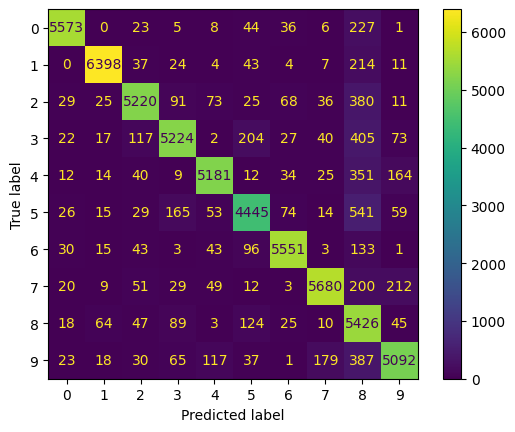

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3,n_jobs=-1)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

- Most values across main diagonal look like they were predicted correctly except for cell at (row,col):(5,5). It's darker than most digits.
- Model made more errors on 5's or because there are fewer 5's in dataset than other digit. 
- We can normalize the confusion matrix by dividing each value by total no of images in the corresponding true class

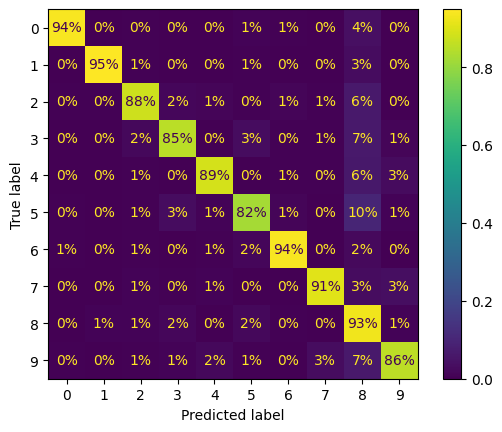

In [67]:
ConfusionMatrixDisplay.from_predictions(y_train,
                                        y_train_pred,
                                        normalize='true',
                                        values_format='.0%')
plt.show()

- 82% of images of 5 are classified correctly. 
- The most common error the model made with images of 5 was to misclassify them as 8. (10% error)
- Only 2% of 8's were misclassified as 5.

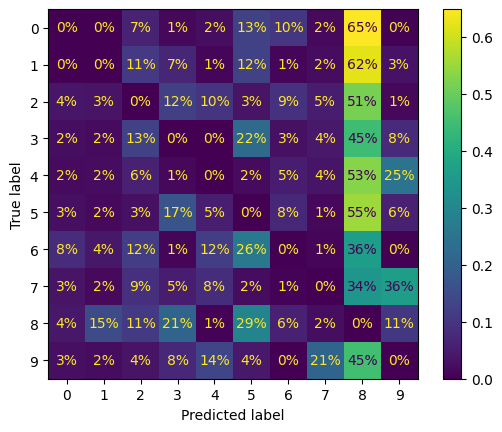

In [68]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train,
                                        y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize='true',
                                        values_format=".0%")
plt.show()

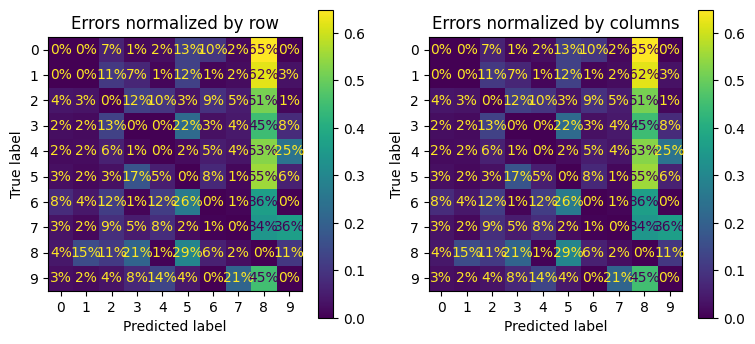

In [69]:
fig,axs = plt.subplots(1,2,figsize=(9,4))
ConfusionMatrixDisplay.from_predictions(y_train,
                                        y_train_pred,
                                        ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize='true',
                                        values_format=".0%")
axs[0].set_title("Errors normalized by row")

ConfusionMatrixDisplay.from_predictions(y_train,
                                        y_train_pred,
                                        ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize='true',
                                        values_format='.0%')
axs[1].set_title("Errors normalized by columns")
plt.show()

In [70]:
cl_a,cl_b = '3','5'

X_aa = X_train[(y_train == cl_a) & (y_train == cl_a)] # TP
X_ab = X_train[(y_train == cl_a) & (y_train == cl_b)] # FN
X_bb = X_train[(y_train == cl_b) & (y_train == cl_b)] # TN
X_ba = X_train[(y_train == cl_b) & (y_train == cl_a)] # FP

print("TP:",len(X_aa))
print("FN:",len(X_ab))
print("FP:",len(X_ba))
print("TN:",len(X_bb))

TP: 6131
FN: 0
FP: 0
TN: 5421


Multilabel Classification

In [71]:
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype("int8") % 2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(X_train,y_multilabel)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",-1


In [72]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [73]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3,n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")


0.9764102655606048

In [74]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")


0.9778357403921755

In [75]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(random_state=42),cv=3,random_state=42)
chain_clf.fit(X_train[:2000],y_multilabel[:2000])

,estimator estimator: estimatorThe base estimator from which the classifier chain is built.,SVC(random_state=42)
,"order order: array-like of shape (n_outputs,) or 'random', default=NoneIf `None`, the order will be determined by the order of columns inthe label matrix Y.:: order = [0, 1, 2, ..., Y.shape[1] - 1]The order of the chain can be explicitly set by providing a list ofintegers. For example, for a chain of length 5.:: order = [1, 3, 2, 4, 0]means that the first model in the chain will make predictions forcolumn 1 in the Y matrix, the second model will make predictionsfor column 3, etc.If order is `random` a random ordering will be used.",None
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines whether to use cross validated predictions or truelabels for the results of previous estimators in the chain.Possible inputs for cv are:- None, to use true labels when fitting,- integer, to specify the number of folds in a (Stratified)KFold,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.",3
,"chain_method chain_method: {'predict', 'predict_proba', 'predict_log_proba', 'decision_function'} or list of such str's, default='predict'Prediction method to be used by estimators in the chain forthe 'prediction' features of previous estimators in the chain.- if `str`, name of the method;- if a list of `str`, provides the method names in order of preference. The method used corresponds to the first method in the list that is implemented by `base_estimator`... versionadded:: 1.5",'predict'
,"random_state random_state: int, RandomState instance or None, optional (default=None)If ``order='random'``, determines random number generation for thechain order.In addition, it controls the random seed given at each `base_estimator`at each chaining iteration. Thus, it is only used when `base_estimator`exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: bool, default=FalseIf True, chain progress is output as each model is completed... versionadded:: 1.2",False
,"base_estimator base_estimator: estimator, default=""deprecated""Use `estimator` instead... deprecated:: 1.7 `base_estimator` is deprecated and will be removed in 1.9. Use `estimator` instead.",'deprecated'
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'


In [76]:
chain_clf.predict([some_digit])


array([[0., 1.]])

In [77]:

rng = np.random.default_rng(seed=42)  # to make this code example reproducible
noise_train = rng.integers(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise_train
noise_test = rng.integers(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test


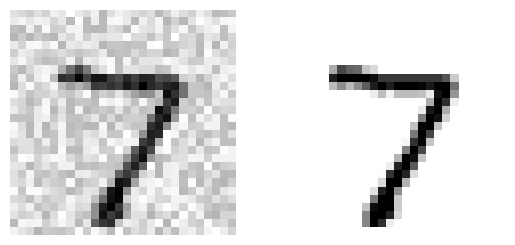

In [78]:
plt.subplot(121)
plot_image(X_test_mod[0])
plt.subplot(122)
plot_image(y_test_mod[0])

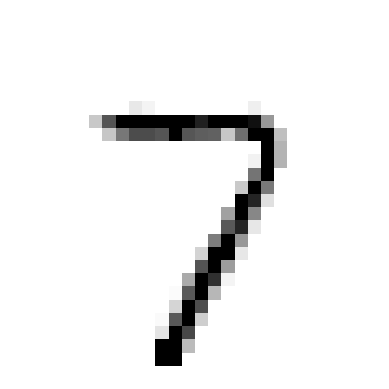

In [79]:
knn_clf = KNeighborsClassifier(n_jobs=1)
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_image(clean_digit)

### Exercises

### 1. An MNIST Classifier With Over 97% Accuracy
Exercise: Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

Let's start with a simple K-Nearest Neighbors classifier and measure its performance on the test set. This will be our baseline:

In [80]:
from sklearn.datasets import fetch_openml 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score

In [81]:
mnist = fetch_openml('mnist_784',as_frame=False)
X,y = mnist.data,mnist.target
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (56000, 784)
X_test shape: (14000, 784)
y_train shape: (56000,)
y_test shape: (14000,)


In [83]:
from sklearn.pipeline import Pipeline 

knn_pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("knn_clf",KNeighborsClassifier(n_jobs=-1))
])

knn_pipeline.steps

[('scaler', StandardScaler()), ('knn_clf', KNeighborsClassifier(n_jobs=-1))]

In [84]:
knn_pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('knn_clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem."

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "knn_clf__n_neighbors":[5,10,15,20],
    "knn_clf__weights":["uniform","distance"]
}

grid_search = GridSearchCV(knn_pipeline,
                           param_grid=param_grid,
                           scoring='accuracy',
                           n_jobs=-1,
                           cv=5)

grid_search.fit(X_train[:10000],y_train[:10000])

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...(n_jobs=-1))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'knn_clf__n_neighbors': [5, 10, ...], 'knn_clf__weights': ['uniform', 'distance']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the

In [86]:
print(grid_search.best_score_)

0.9065999999999999


In [87]:
final_knn_model = grid_search.best_estimator_
final_knn_model.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('knn_clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'distance'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.

In [88]:
from sklearn.metrics import accuracy_score

y_train_pred = final_knn_model.predict(X_train)
train_acc = accuracy_score(y_train,y_train_pred)
print("Training acc:",train_acc)
y_test_pred = final_knn_model.predict(X_test)
test_acc = accuracy_score(y_test,y_test_pred)
print("Testing accuracy:",test_acc)

Training acc: 1.0
Testing accuracy: 0.9475714285714286


### 2. Data Augmentation
Exercise: Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. You can use the shift() function from the scipy.ndimage module. For example, shift(image, [2, 1], cval=0) shifts the image two pixels down and one pixel to the right. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called _data augmentation or training set expansion._

In [89]:
#  write shift image function
# shift(image,[2,1],cval=0) 2 pixels down and 1 pixel to right
# for each train img create 4 copies one per direction and add them to training set
# Finally train the best model on the expanded training set
# measure acc on test set. 

In [93]:
from scipy.ndimage import shift 

def shift_image(image,dx,dy):
    image = image.reshape((28,28))
    shifted_image = shift(image,[dy,dx],cval=0,mode='constant')
    return shifted_image.reshape([-1]) # flattening img to shape (784,)

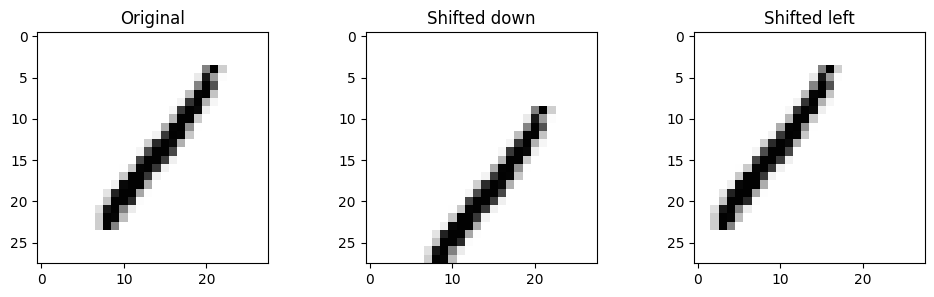

In [94]:
image = X_train[1000]
shifted_image_down = shift_image(image,0,5)
shifted_image_left = shift_image(image,-5,0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original")
# the images are being reshaped to (28,28) imshow expects a 2d array for imgs 
plt.imshow(image.reshape(28,28),
           interpolation='nearest',
           cmap='Greys')

plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28,28),
           interpolation='nearest',
           cmap='Greys')

plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28,28),
           interpolation='nearest',
           cmap='Greys')
plt.show()



Creating the augmented training set

In [95]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx,dy in ((-1,0),(1,0),(0,1),(0,-1)):
    for image,label in zip(X_train,y_train):
        X_train_augmented.append(shift_image(image,dx,dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [97]:
print("Original array X_train shape:",X_train.shape)
print("Augmented X_train array shape:",X_train_augmented.shape)
print("Original array y_train shape:",y_train.shape)
print("Augmented y_train array shape:",y_train_augmented.shape)


Original array X_train shape: (56000, 784)
Augmented X_train array shape: (280000, 784)
Original array y_train shape: (56000,)
Augmented y_train array shape: (280000,)


In [98]:
rng = np.random.default_rng(seed=42)
shuffle_idx = rng.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [101]:
grid_search.best_params_

{'knn_clf__n_neighbors': 5, 'knn_clf__weights': 'distance'}

In [103]:
knn_clf = KNeighborsClassifier(n_neighbors=5,weights='distance',n_jobs=-1)
knn_clf.fit(X_train_augmented,y_train_augmented)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'distance'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",-1


In [104]:
augmented_accuracy = knn_clf.score(X_test, y_test)
augmented_accuracy


0.9799285714285715